# Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv('/home/campus-2/Documents/Projet_arbre/data/arbres.csv', 
                 header = 0, index_col = False, names=None)

## Genres et especes

### Diversité

### Especes desirées / non-desirées

# Diversité
### Definition espèces et ajouter au DataFrame

In [9]:
df["GENRE_ESPECE"] = df["GENRE_BOTA"] + " "  + df["ESPECE"]


In [74]:
especes_unique = df['GENRE_ESPECE'].dropna().unique()

nb_especes = len(especes_unique)



In [75]:
print(especes_unique[:10])
print(nb_especes)

['Acer pseudoplatanus' 'Quercus cerris' 'Quercus frainetto'
 'Robinia pseudoacacia' 'Fraxinus excelsior' 'Prunus domestica'
 'Platanus acerifolia' 'Liriodendron tulipifera' 'Pinus nigra'
 'Acer campestre']
313


### Nombre d'arbres par especes

In [18]:
nb_arbres_espesces = df["GENRE_ESPECE"].value_counts()
df.GENRE_ESPECE.value_counts()

Platanus acerifolia        4371
Carpinus betulus           1311
Acer pseudoplatanus        1304
Pinus nigra                1276
Acer platanoides           1097
                           ... 
Sorbopyrus auricularis        1
Prunus tomentosa              1
Amélanchier grandiflora       1
Celtis julianae               1
Araucaria exelsa              1
Name: GENRE_ESPECE, Length: 313, dtype: int64

In [16]:
df.GENRE_ESPECE.count()

28595

In [20]:

nb_arbres_espesces.apply(lambda x : x / df["GENRE_ESPECE"].count()*100)

Platanus acerifolia        15.285889
Carpinus betulus            4.584718
Acer pseudoplatanus         4.560238
Pinus nigra                 4.462319
Acer platanoides            3.836335
                             ...    
Sorbopyrus auricularis      0.003497
Prunus tomentosa            0.003497
Amélanchier grandiflora     0.003497
Celtis julianae             0.003497
Araucaria exelsa            0.003497
Name: GENRE_ESPECE, Length: 313, dtype: float64

## Comment la diversité evolue avec le temps ? 

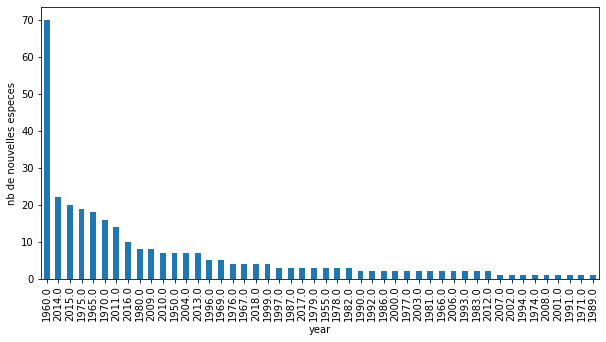

In [67]:

year_of_apperiance = df.groupby(df['GENRE_ESPECE']).ANNEEDEPLANTATION.min()

nb_new_year = year_of_apperiance.value_counts()

ax = nb_new_year.plot.bar(figsize = (10,5))
ax.set_xlabel('year')
ax.set_ylabel("nb de nouvelles especes")
plt.show()

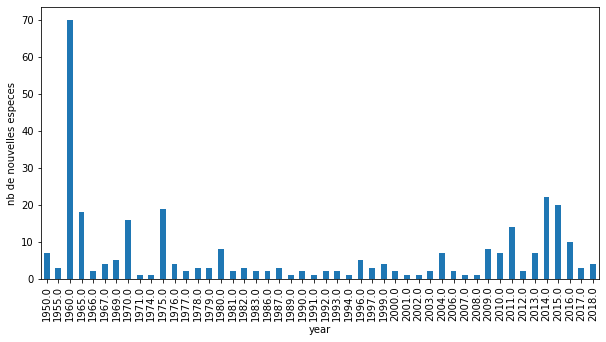

In [68]:

nb_new_year = year_of_apperiance.value_counts().sort_index()
ax = nb_new_year.plot.bar(figsize = (10,5))
ax.set_xlabel('year')
ax.set_ylabel("nb de nouvelles especes")
plt.show()

### total number of especes par annees 


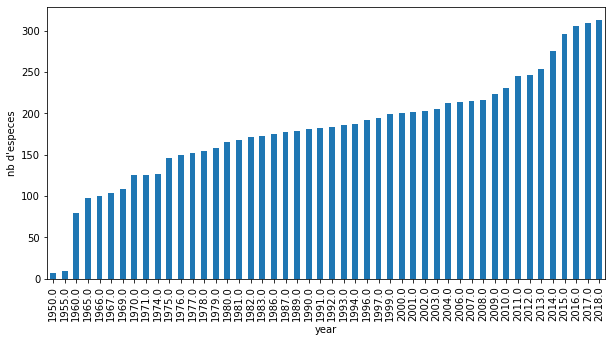

In [70]:
year_num = nb_new_year.sort_index().cumsum()

ax = year_num.plot.bar(figsize = (10,5))
ax.set_xlabel('year')
ax.set_ylabel("nb d'especes")
plt.show()



## Especes desirées / non-desirées

In [54]:
list_genre_non_desiree = ['Aesculus',
                          'Fraxinus',
                          'Platanus',
                           'Betula',
                          'Castanea',
                          'Cupressus',
                          'Olea' ]


list_especes_non_desiree2 = [ 'Acer saccharinum', 
                            'Albizzia julibrissin',
                            'Catalpa bignonoides',
                            'Ginkgo biloba',
                            'Gleditsia triacanthos',
                            'Koelreuteria paniculata',
                            'Laburnum anagyroides',
                            'Paulownia tomentosa',
                            'Prunus pissardi',
                            'Sophora japonica',
                            'Acer palmatum',
                            'Acer pseudoplatanus',
                           'Cryptomeria japonica',
                            'Davidia involucrata',
                           'Fagus sylvatica',
                           'Juglans nigra',
                           'Juglans ailantifolia',
                            'Liriodendron tulipifera',
                           'Magnolia grandiflora',
                           'Nerium oleander',
                           'Picea abies', 
                           'Populus alba',
                           'Quercus bicolor',
                           'Quercus macrocarpa',
                           'Quercus nigra',
                           'Quercus rubra',
                           'Quercus alba',
                           'Salix alba',
                           'Salix gracolistyla',
                           'Salix daphnoides',
                           'Salix cinerea',
                           'Salix arenaria',
                           'Salix acutifolia',
                           'Sorbus aucuparia',
                           'Ailanthus altissima',
                            'Robinia pseudoacacia',
                            'Acer negundo',
                            'Acer platanoides', 
                            'Acer pseudoplatanus'   
                            ]

### Creation d'un nouveau DataFrame

In [56]:
col_new = ['GENRE_BOTA', 'GENRE_ESPECE', 'ANNEEDEPLANTATION' ]
df1 = df[col_new].copy().dropna()


### Ajouter dans mon dataframe information si l'arbre est desirée / non-desirée

ajouter une colonne qui contient l'année annees si l'arbre est desirée sinon NaN

In [57]:
df1['ESP_NON_DES'] = df1.ANNEEDEPLANTATION[df1.GENRE_BOTA.isin(list_genre_non_desiree)  | df1.GENRE_ESPECE.isin(list_especes_non_desiree2)]


ajouter une colonne qui contient l'année annees si l'arbre non est desirée sinon NaN

In [71]:
df1['ESP_DES'] = df1.ANNEEDEPLANTATION[~df1.GENRE_BOTA.isin(list_genre_non_desiree) & ~df1.GENRE_ESPECE.isin(list_especes_non_desiree2)]



## Creer un plot qui montre le nombre des especes desirée / non-desirée par annee 

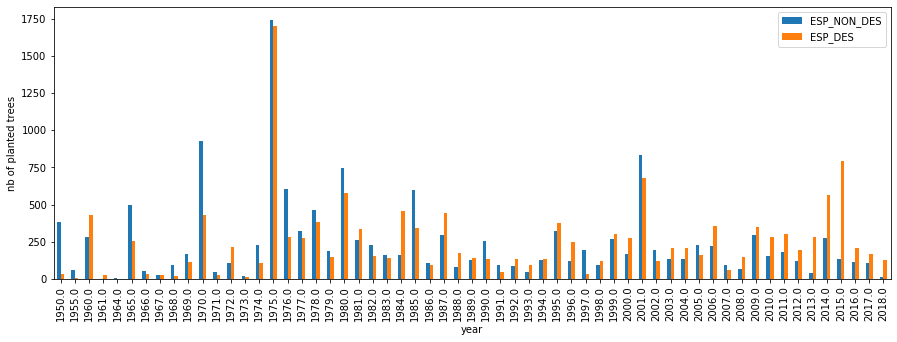

In [59]:
dfplot = pd.concat([df1['ESP_NON_DES'].value_counts().sort_index()
                    ,df1['ESP_DES'].value_counts().sort_index()], axis=1)

ax = dfplot.plot.bar(figsize = (15,5))
ax.set_xlabel('year')
ax.set_ylabel("nb d'arbres plantés")

ax.legend()
plt.show()